# 1. Actividad solar: frecuencia manchas solares

This notebook is part of the work done under the project Astronomía Accesible (http://astroaccesible.iaa.es/)<br>

This notebook uses data from the SILSO data/image $-$ Royal Observatory of Belgium, Brussels (http://sidc.be/silso/home), to study the solar activity's frequency. It is known to be approximately 11 years. We will calculate this explicitly. All plots will be sonified.

In [1]:
from astronify.series import SoniSeries
import numpy
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks

from astropy.table import Table

from matplotlib import rcParams

rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1.5
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1.5


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [2]:
# Only to be run once:
import os
os.chdir('../')
folder = os.getcwd()

In [3]:
# Data source (credit): SILSO data/image, Royal Observatory of Belgium, Brussels
# dowloaded from http://sidc.oma.be/silso/DATA/SN_y_tot_V2.0.txt
data = numpy.loadtxt(folder + '/data/SN_y_tot_V2.0.txt')

time = data[:,0]     # time column [years]
sunspots = data[:,1] # Yearly mean total sunspot number

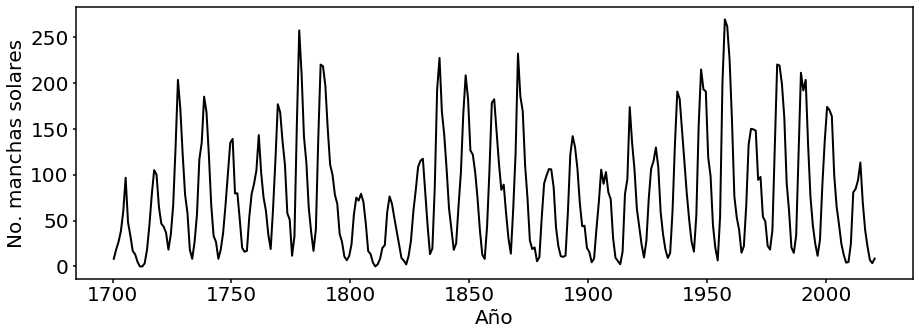

In [4]:
rcParams['font.size']=20

fig = plt.figure(figsize = (15,5))
ax = fig.subplots()

ax.plot(time, sunspots, color = 'k', linewidth = 2)

ax.set_xlabel('Año')
ax.set_ylabel('No. manchas solares')

fig.savefig(folder + '/plots/machassolares_año.png', dpi=500, bbox_inches='tight')

plt.show()

In [5]:
# Standard procedure to sonify sunspots' time series:

data_table = Table({"time": time,"flux": sunspots})
data_soni = SoniSeries(data_table)

#  Default note spacing (median time between notes in seconds) is 0.01,
#  slow it down to hear all the data points
data_soni.note_spacing = 0.1

data_soni.sonify()
data_soni.write(folder + '/sonifications/sunspots1.wav')

Pyo message: Offline Server rendering file /media/irene/6000-8897/AstroAccesible/sonifications/sunspots1.wav dur=32.500000
Pyo message: Offline Server rendering finished.


In [6]:
# Compute periodicity of the data:

# Fourier transform the sunspots data:
fourier_coeffs = numpy.abs(fft(sunspots))
# Dominant term (excluding the zeroth -- only a phase (no physical significance))
index_max_amplitude = numpy.argmax(fourier_coeffs[1:])+1 # +1 to get correct indexing because of [1:]

# Time frequency it corresponds to:
N = sunspots.size
dt = time[1] - time[0]  # time step [years]
fourier_freqs = fftfreq(N, d = dt)    # frequency [1/year] for each amplitude in fourier_coeffs

T = 1/fourier_freqs[index_max_amplitude]  # [year]
print('Period = {:.1f} years'.format(T))

Period = 11.1 years


In [7]:
# Only interested in the first half of the computed array (symmetric)
fourier_freqs  = fourier_freqs[0:N//2]
fourier_coeffs = fourier_coeffs[0:N//2]

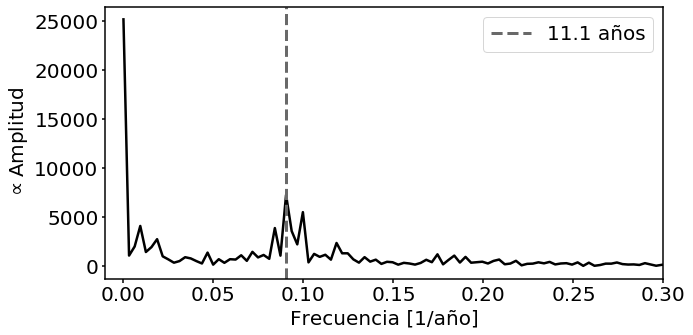

In [8]:
rcParams['font.size']=20

fig = plt.figure(figsize = (10,5))
ax = fig.subplots()

# Frequency dominance within the signal recorded
ax.plot(fourier_freqs,fourier_coeffs, linewidth = 2.5, color='k')

# Check 11.1 years is the most dominant period:
ax.axvline(1/T, color = 'dimgrey', linestyle = 'dashed', linewidth = 3, label = '{:.1f} años'.format(T))

ax.legend()

ax.set_xlabel('Frecuencia [1/año]')
ax.set_ylabel(r'$\propto$Amplitud')

ax.set_xlim(-0.01,0.3) # Not really interesting stuff afterwards

fig.savefig(folder + '/plots/frequencia_manchas_solares.png', dpi=500, bbox_inches='tight')

plt.show()

In [9]:
# Sonify sunspots' frequency series:

data_table = Table({"time": fourier_freqs,"flux": fourier_coeffs})
data_soni = SoniSeries(data_table)

#  Default note spacing (median time between notes in seconds) is 0.01,
#  slow it down to hear all the data points
data_soni.note_spacing = 0.1

data_soni.sonify()
data_soni.write(folder + '/sonifications/sunspots_fourier1.wav')

Pyo message: Offline Server rendering file /media/irene/6000-8897/AstroAccesible/sonifications/sunspots_fourier1.wav dur=16.400000
Pyo message: Offline Server rendering finished.
